## Clustering Demonstration
We will use k-means clustering to show how clustering works, though several other clustering methods exist. The key hyper-parameter associated with k-means is the value $k$ which specifies the number of clusters.

In [2]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

#### Simple k-Means Demo
We first generate some data with four known clusters

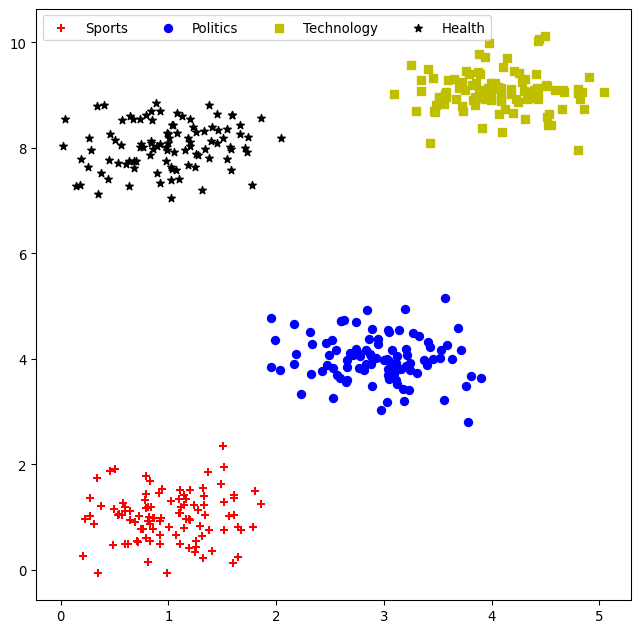

In [4]:
sigma = np.array([[0.2,0],[0,0.2]])
n = 100
mu1 = np.array([1,1])
mu2 = np.array([3,4])
mu3 = np.array([4,9])
mu4 = np.array([1,8])
x11 = np.random.multivariate_normal(mu1,sigma,n)
x15 = np.random.multivariate_normal(mu2,sigma,n)
x51 = np.random.multivariate_normal(mu3,sigma,n)
x55 = np.random.multivariate_normal(mu4,sigma,n)

X = np.vstack([x11,x15,x51,x55])
y = np.zeros([4*n,1])
y[n:2*n] = 1
y[2*n:3*n] = 2
y[3*n:4*n] = 3
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[np.where(y == 0)[0],0],X[np.where(y == 0)[0],1],c='r',marker='+')
plt.scatter(X[np.where(y == 1)[0],0],X[np.where(y == 1)[0],1],c='b',marker='o')
plt.scatter(X[np.where(y == 2)[0],0],X[np.where(y == 2)[0],1],c='y',marker='s')
plt.scatter(X[np.where(y == 3)[0],0],X[np.where(y == 3)[0],1],c='k',marker='*')

plt.legend(['Sports','Politics','Technology','Health'],ncol=4,loc=2)

Stack all data together and select four random cluster centers

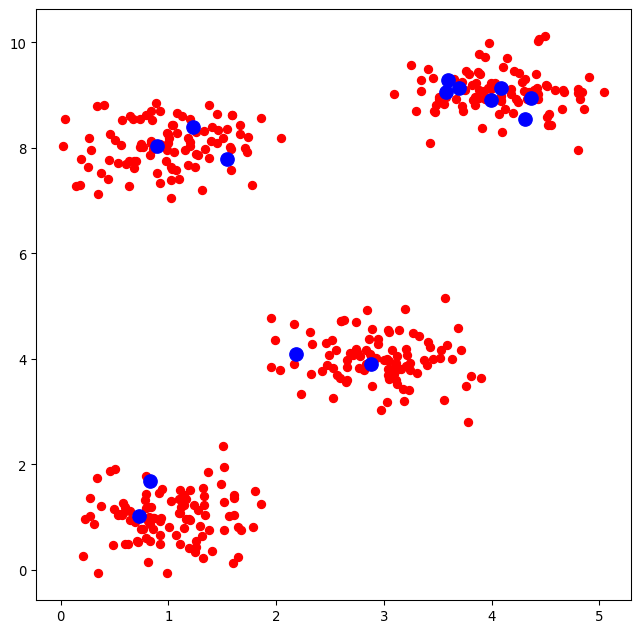

In [6]:
k = 14
r = np.random.permutation(X.shape[0])
init_centroids = X[r[0:k],:]
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c='r')
plt.scatter(init_centroids[:,0],init_centroids[:,1],c='b',marker='o',s=100)


Assign points to the closest cluster and recompute centroids. Iterate until converged. Notice how quickly k-means converges regardless of the initial conditions. However, this might not always be true.

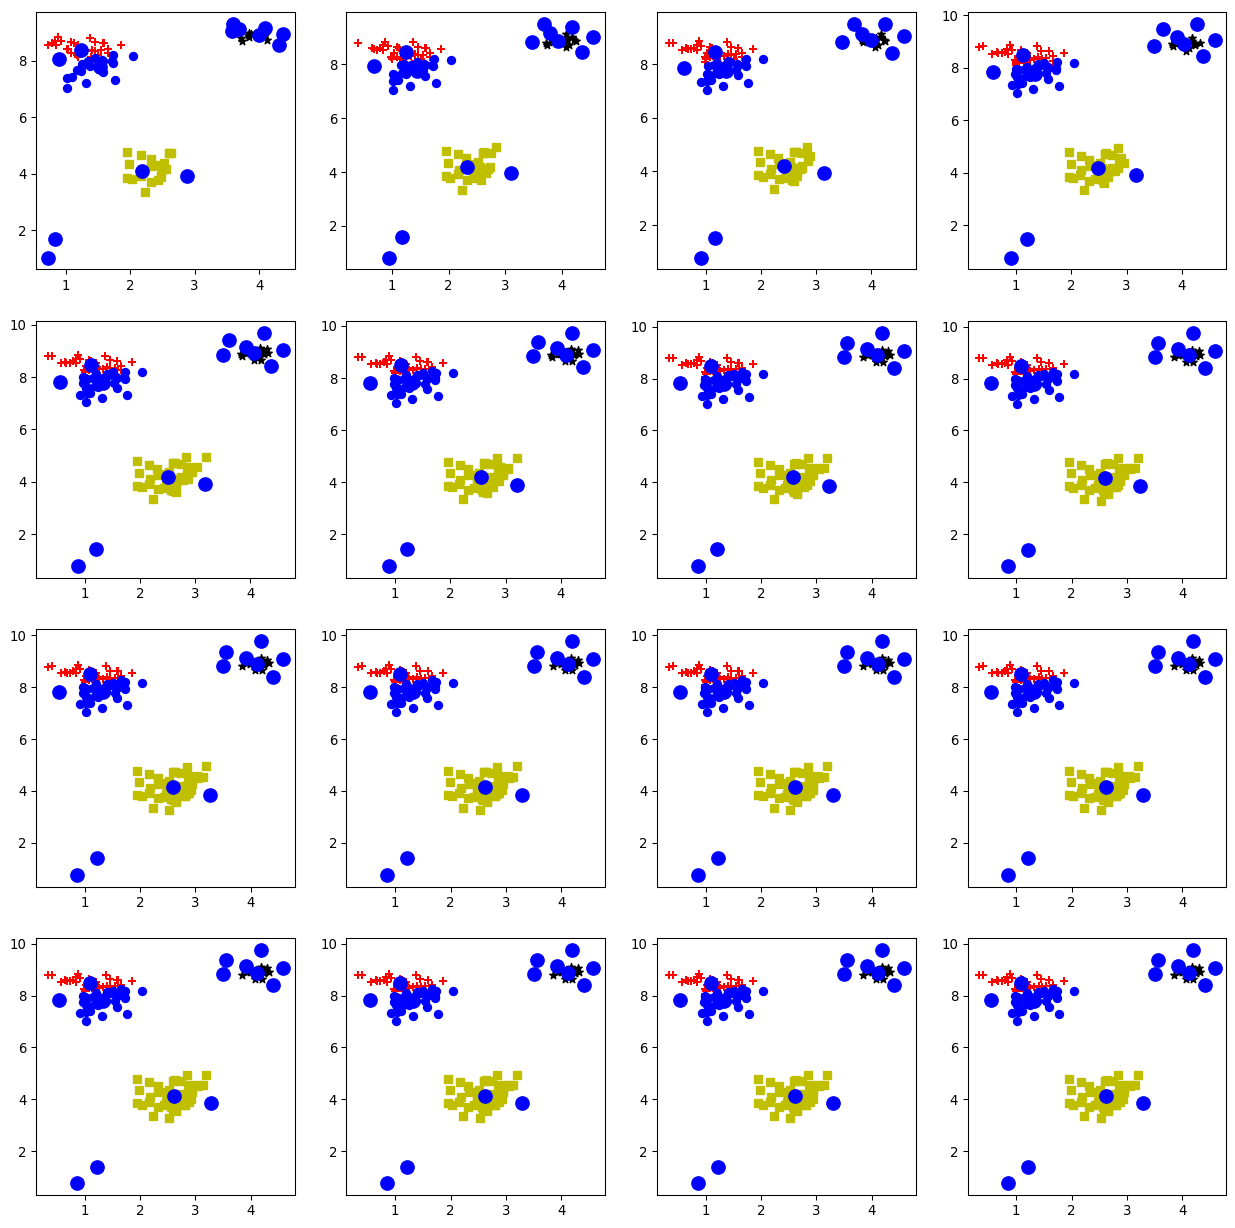

In [8]:
centroids = init_centroids
fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')
for iters in range(16):
    distances = np.zeros((X.shape[0],k))
    for i in range(k):
        for j in range(X.shape[0]):
            distances[j,i] = np.sqrt(np.sum((X[j,:] - centroids[i,:])**2))
    assigned_cluster = np.argmin(distances,axis=1) 
    ax = fig.add_subplot(4,4,iters+1)

    ax.scatter(X[np.where(assigned_cluster == 0)[0],0],X[np.where(assigned_cluster == 0)[0],1],c='r',marker='+')
    ax.scatter(X[np.where(assigned_cluster == 1)[0],0],X[np.where(assigned_cluster == 1)[0],1],c='b',marker='o')
    ax.scatter(X[np.where(assigned_cluster == 2)[0],0],X[np.where(assigned_cluster == 2)[0],1],c='y',marker='s')
    ax.scatter(X[np.where(assigned_cluster == 3)[0],0],X[np.where(assigned_cluster == 3)[0],1],c='k',marker='*')
    ax.scatter(centroids[:,0],centroids[:,1],c='b',marker='o',s=100)

    # recompute centroids
    for i in range(k):
        centroids[i,:] = np.mean(X[np.where(assigned_cluster == i)[0],:],axis=0)

## Using same code for 4 centroids (selected reandomly) and runs 10 times and seed is set for each iteration for reproducibility

Iteration 1
Converged at iteration 14
Iteration 2
Converged at iteration 2
Iteration 3
Converged at iteration 8
Iteration 4
Converged at iteration 10
Iteration 5
Converged at iteration 2
Iteration 6
Converged at iteration 8
Iteration 7
Converged at iteration 3
Iteration 8
Converged at iteration 11
Iteration 9
Converged at iteration 4
Iteration 10
Converged at iteration 13


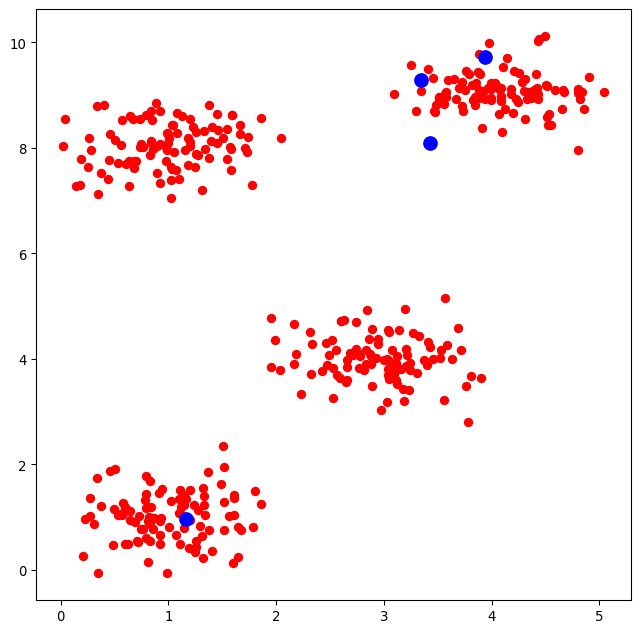

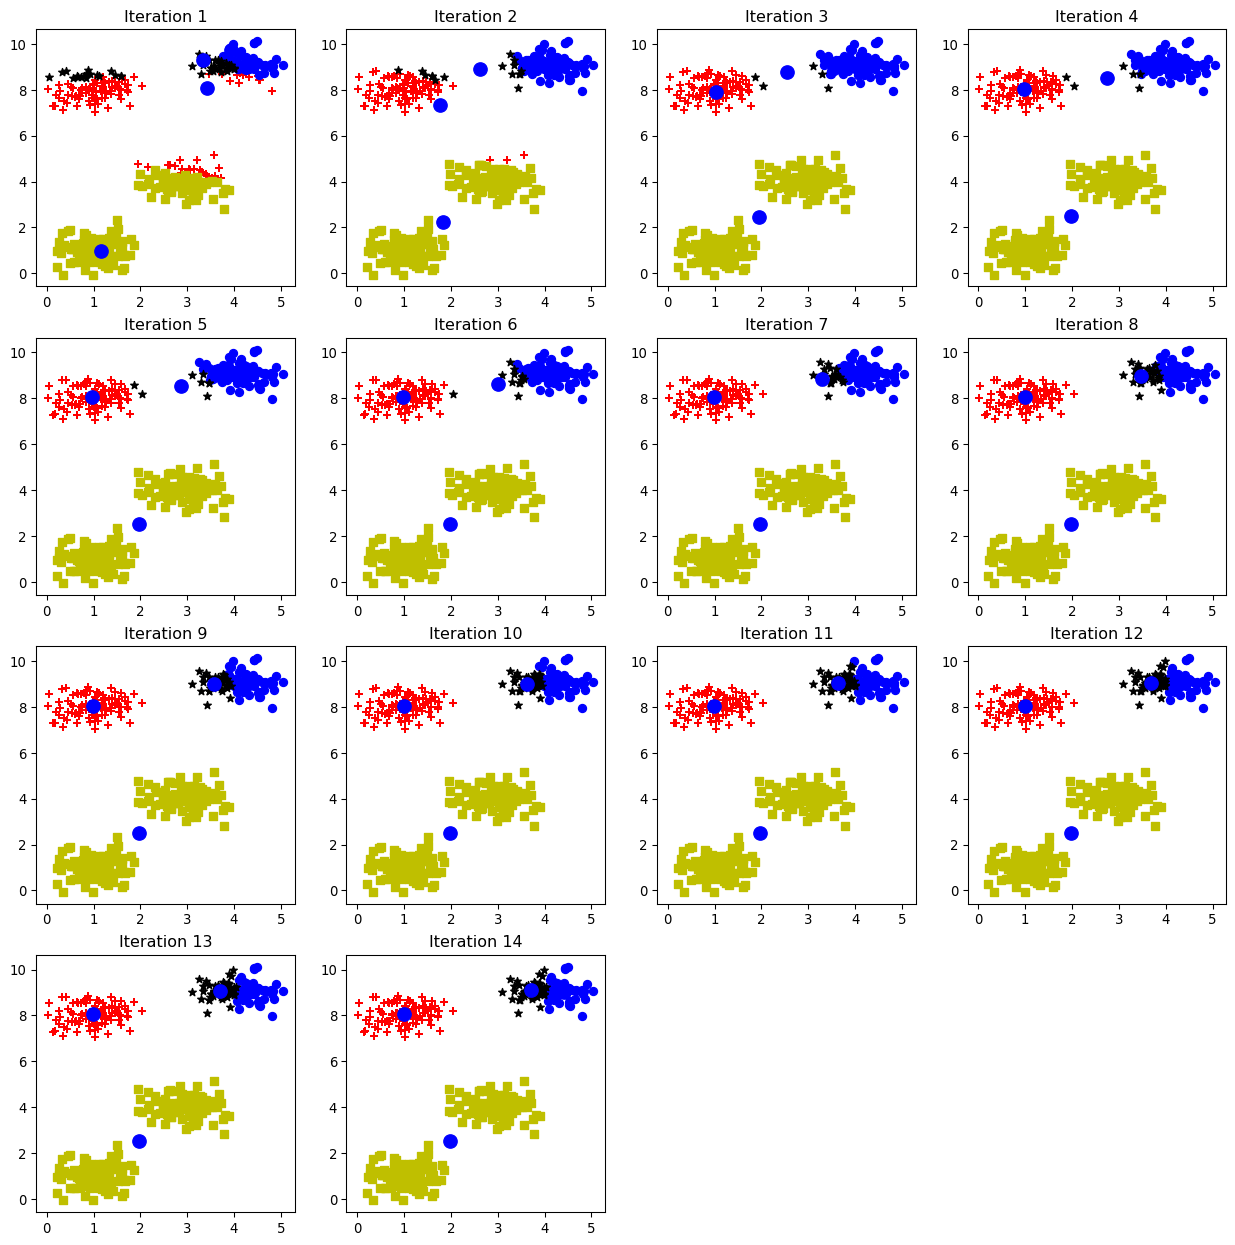

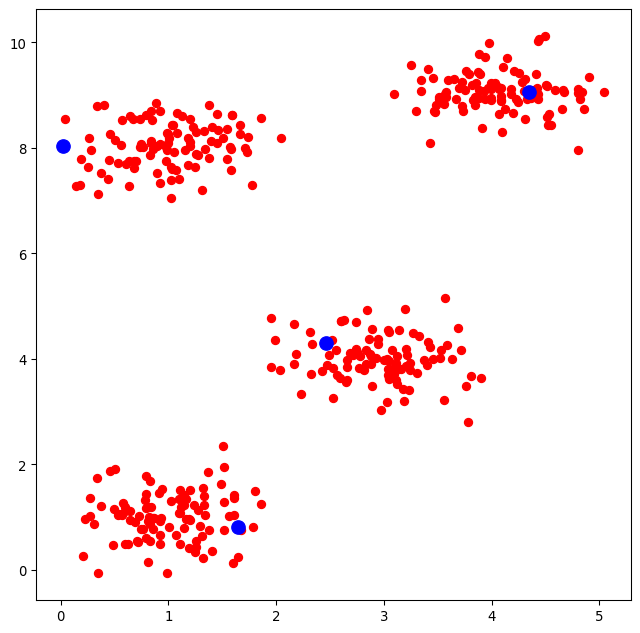

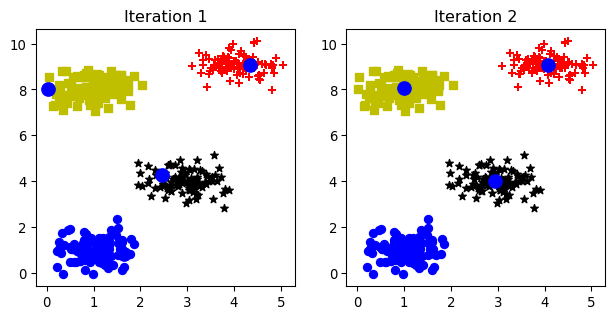

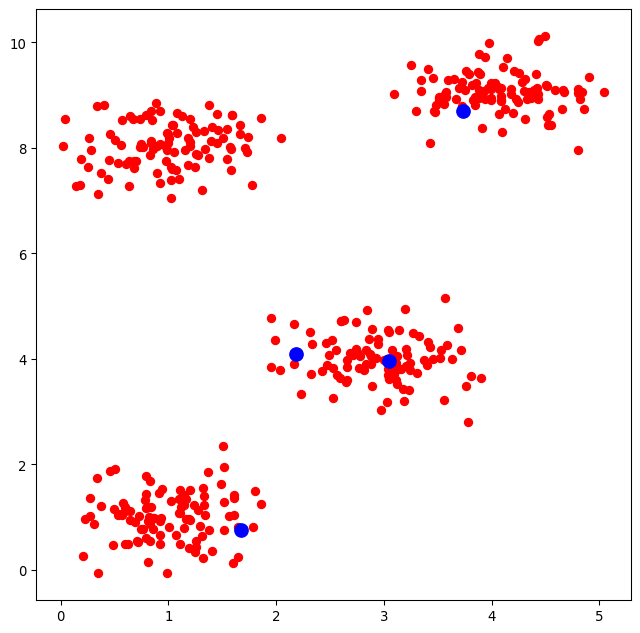

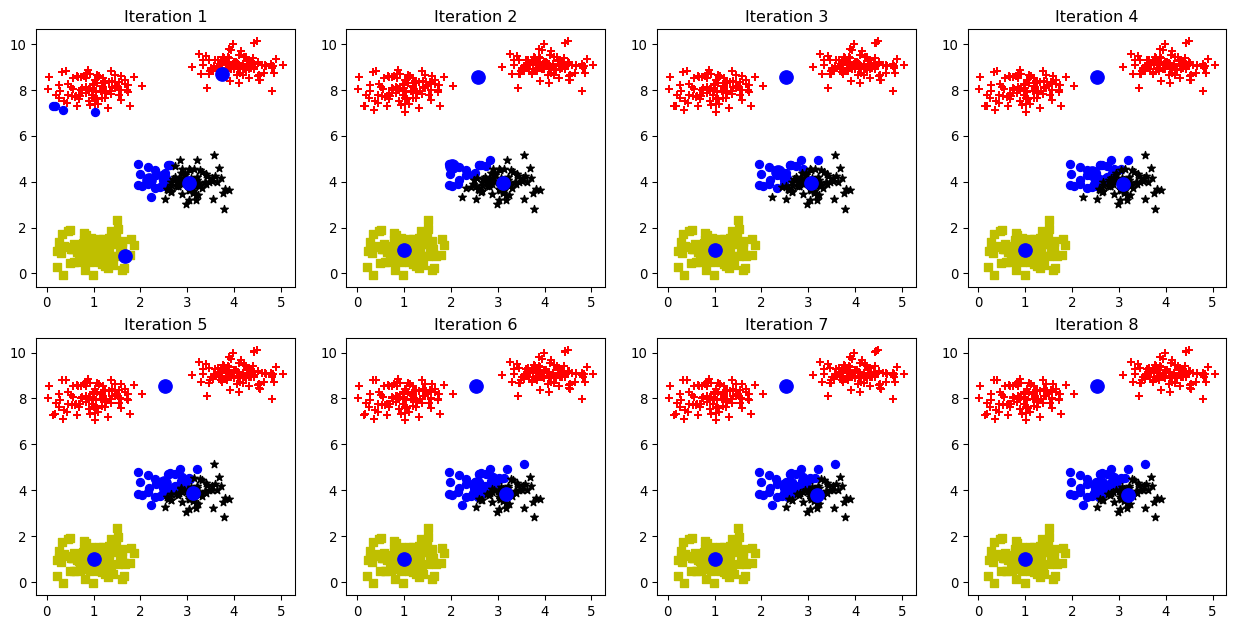

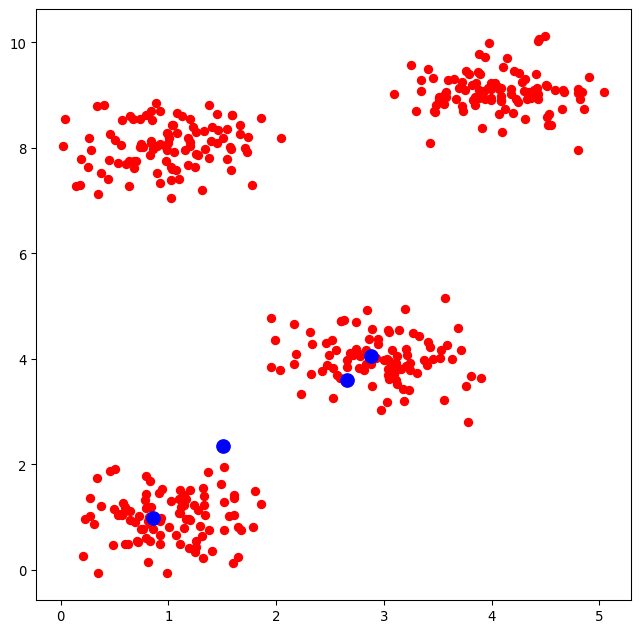

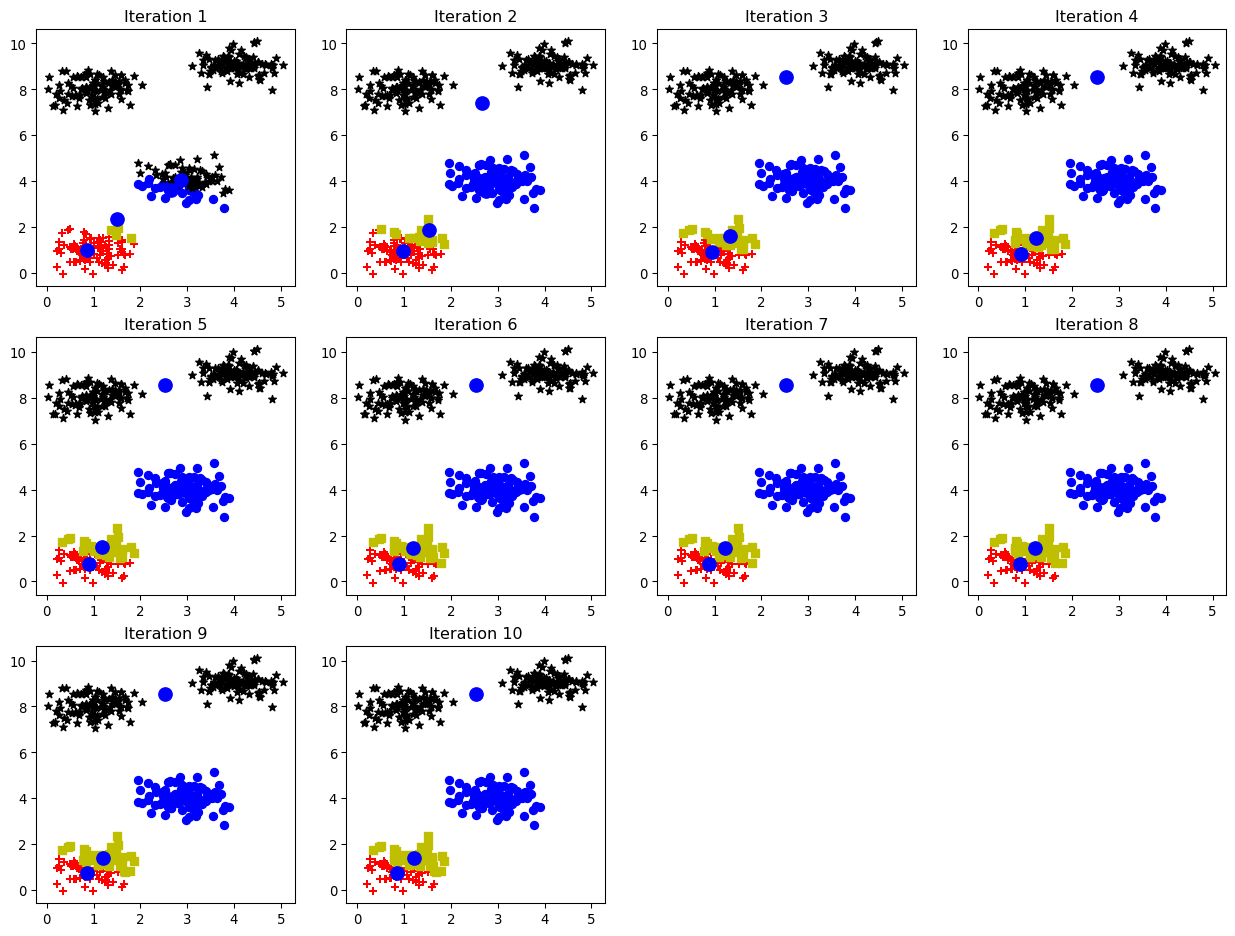

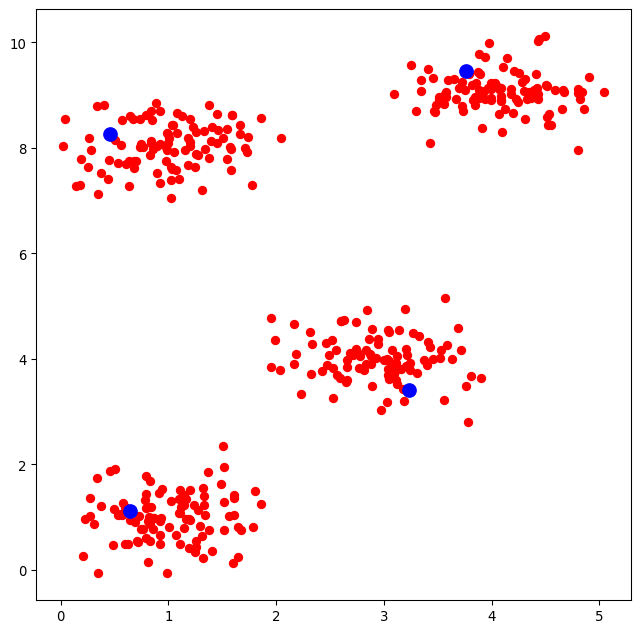

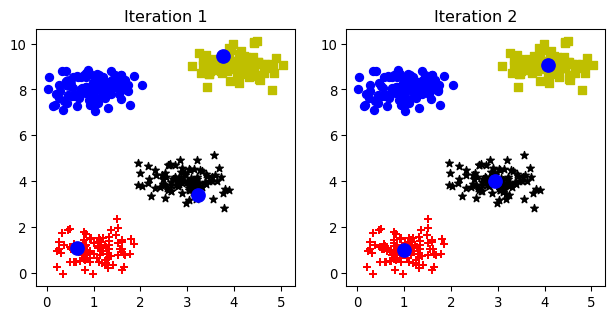

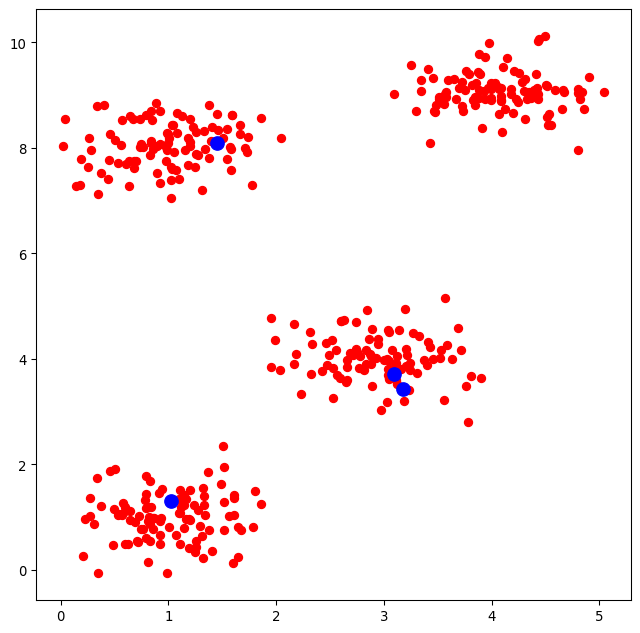

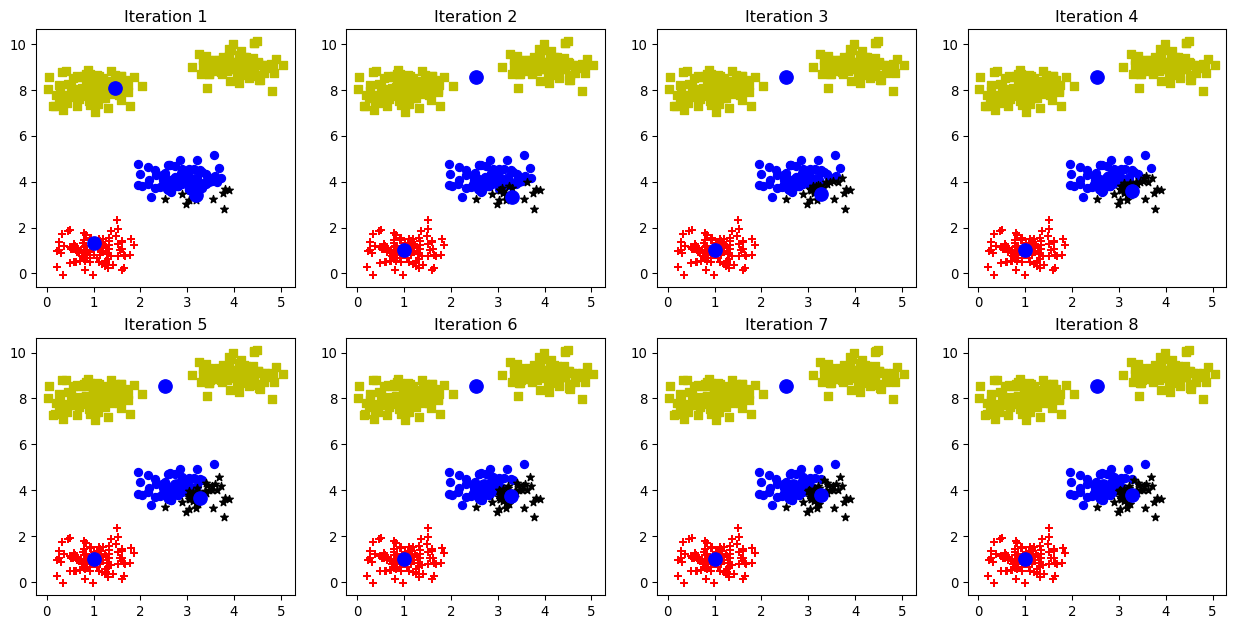

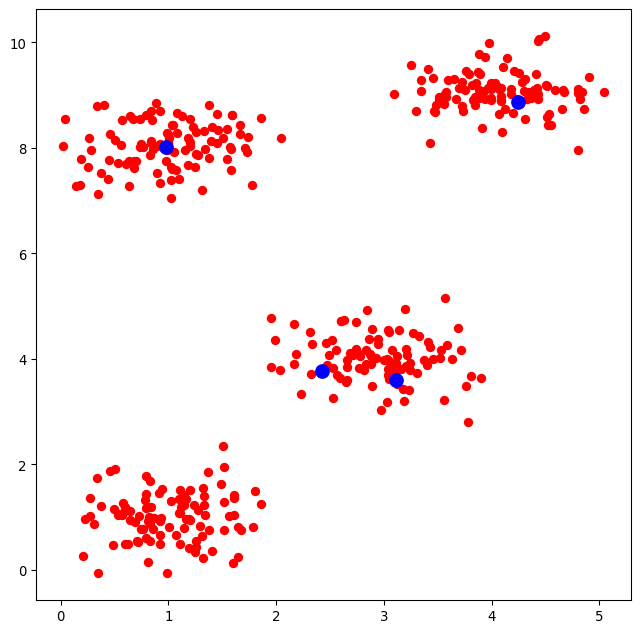

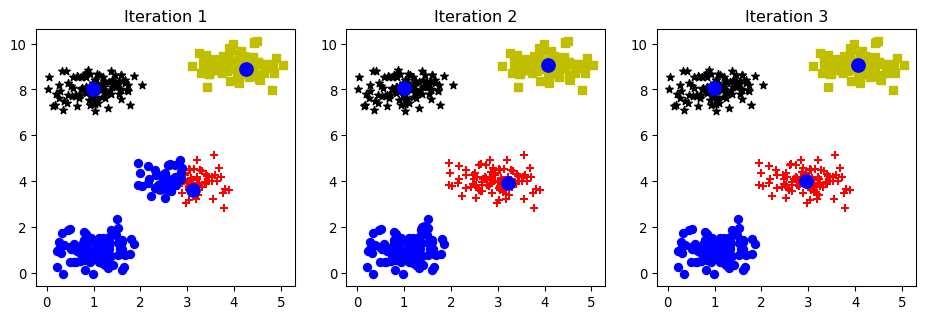

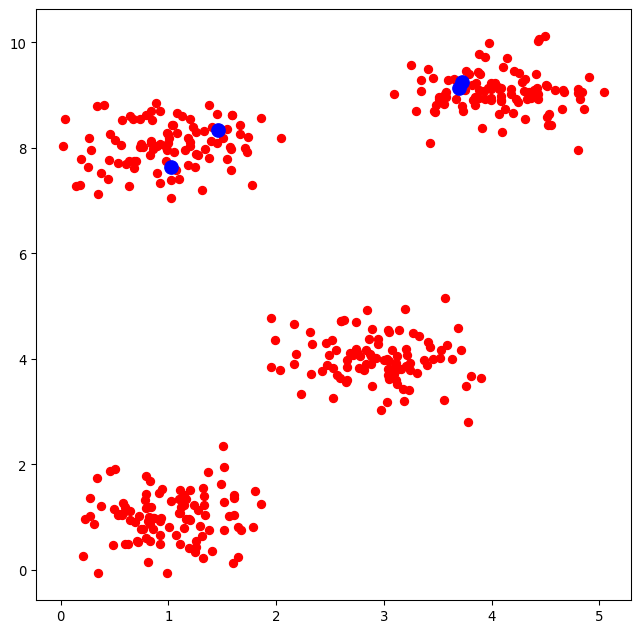

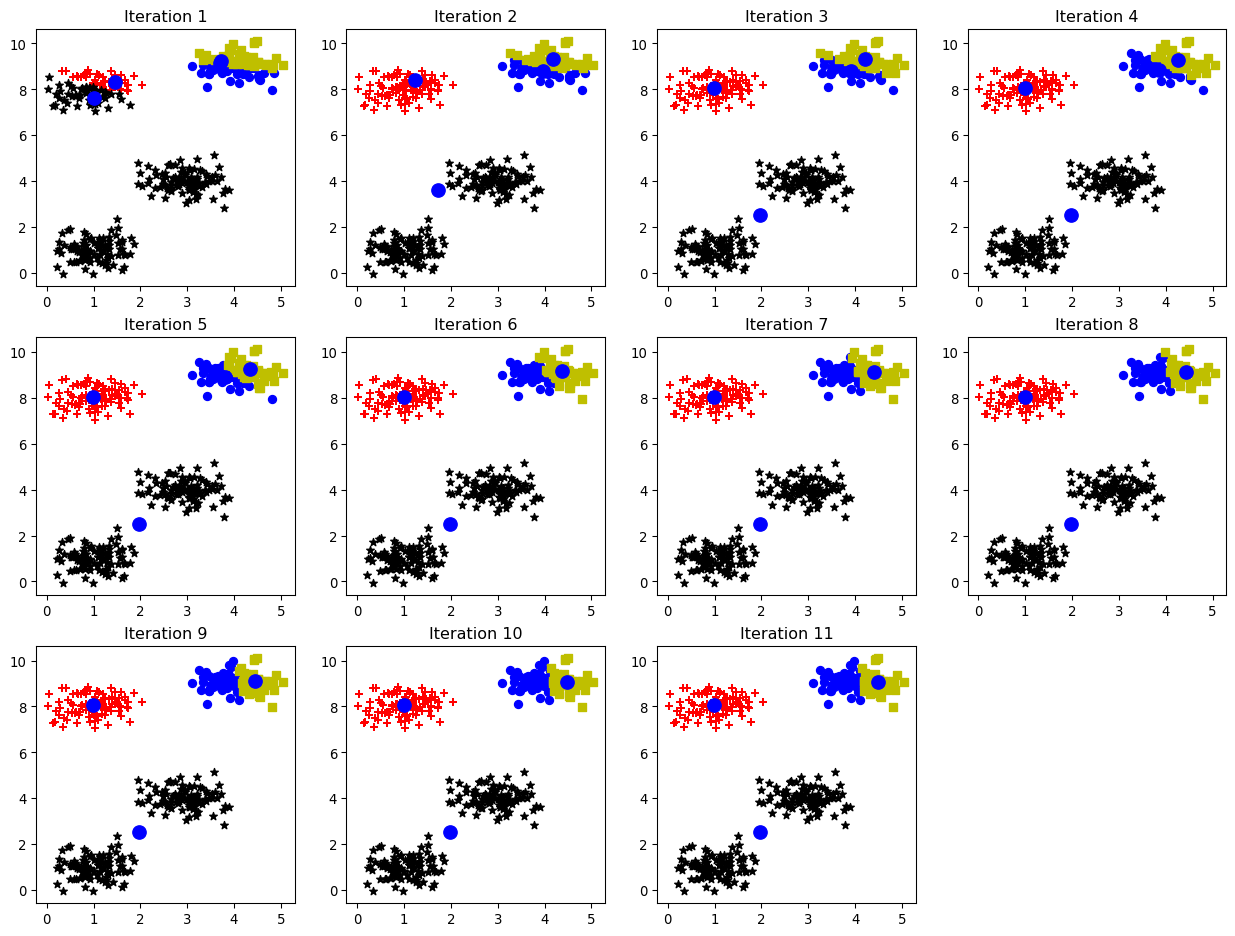

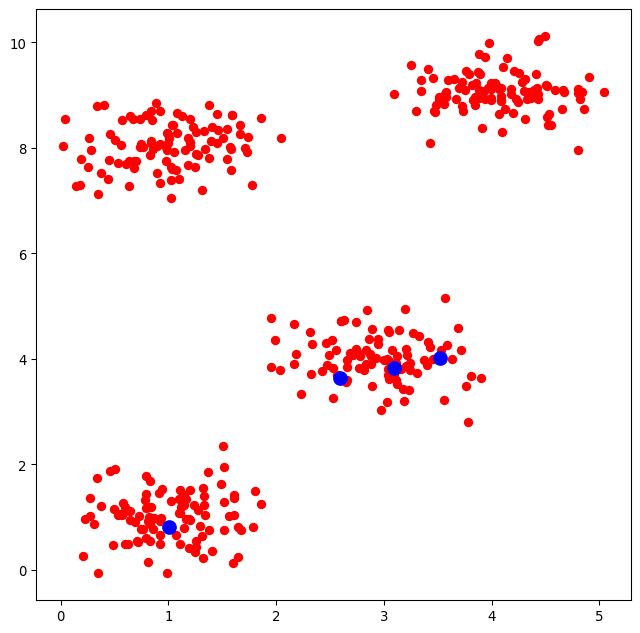

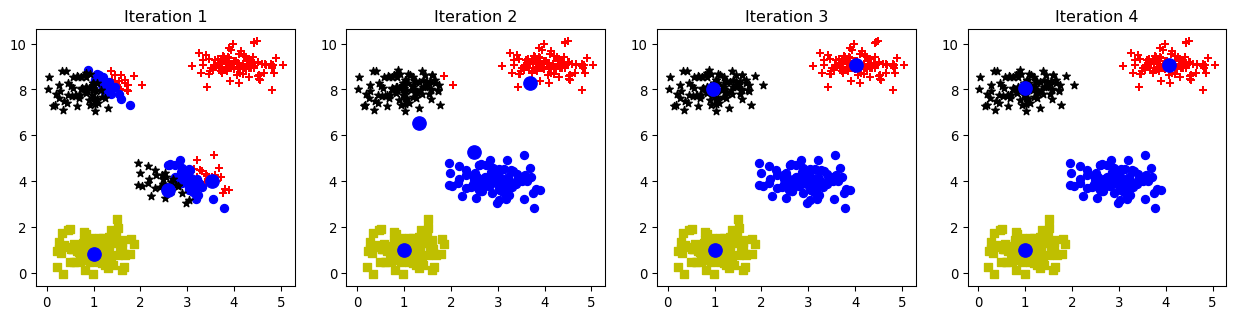

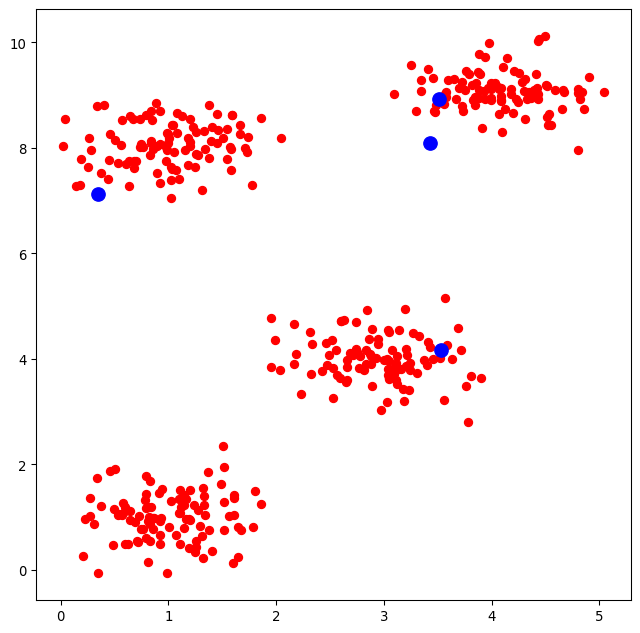

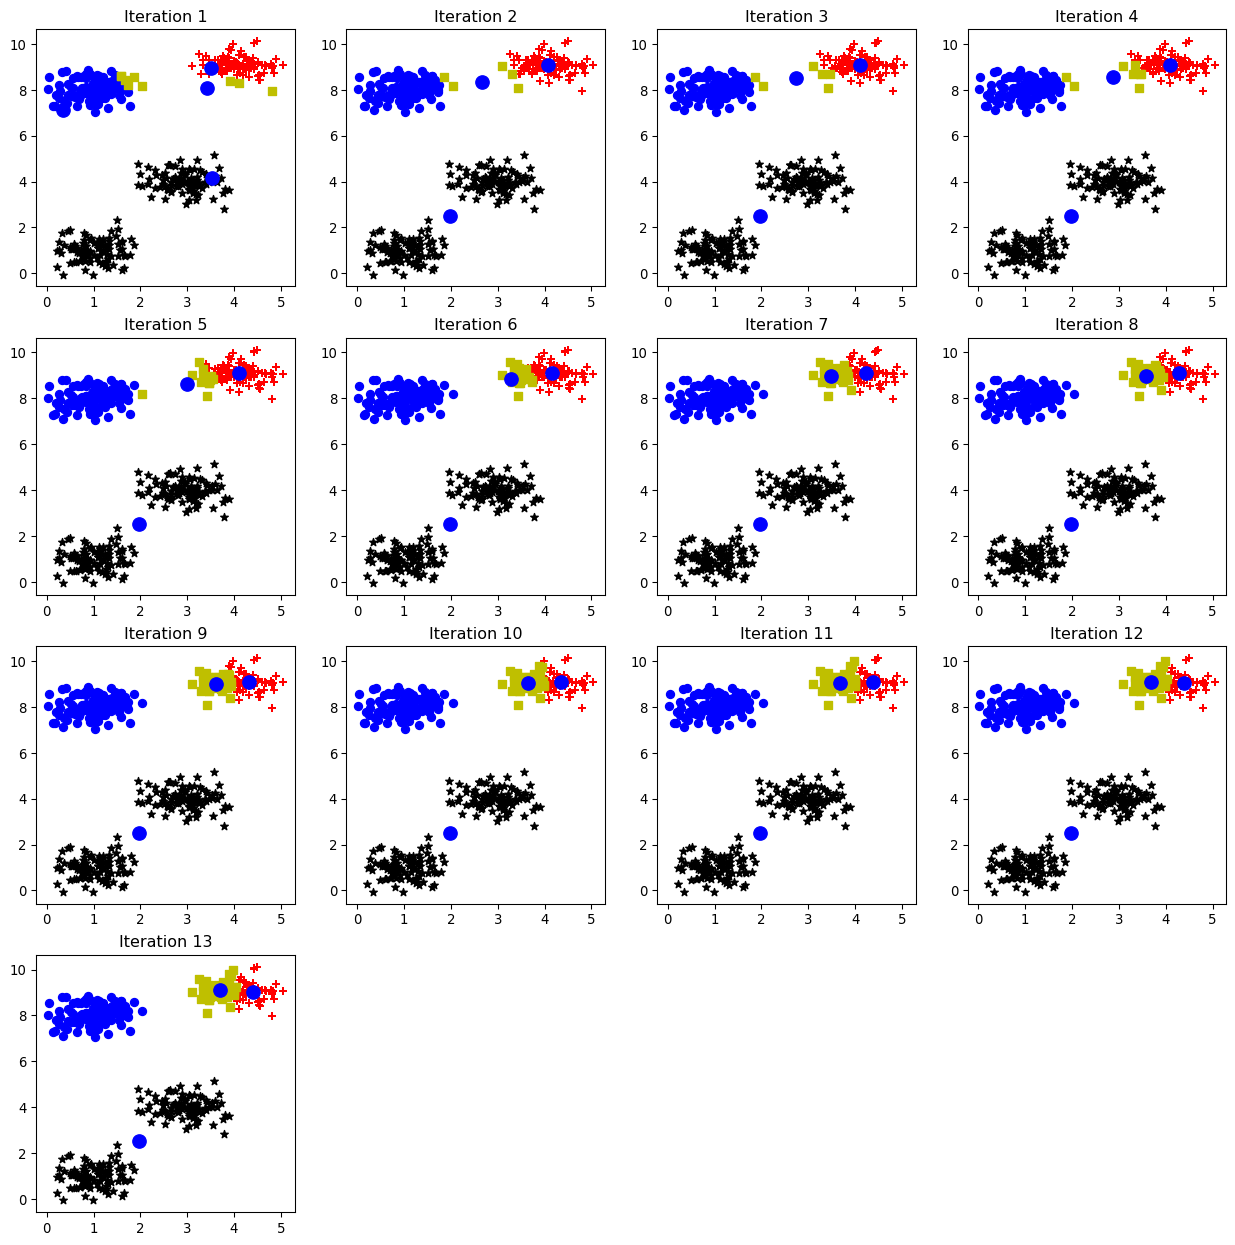

In [10]:
k = 4
# List of 10 seeds for reproducibility
seeds = [42, 123, 256, 789, 101, 999, 57, 301, 567, 893]

for j, seed in enumerate(seeds):
    np.random.seed(seed)
    print(f"Iteration {j+1}")
    r = np.random.permutation(X.shape[0])
    init_centroids = X[r[0:k], :]
    fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
    plt.scatter(X[:,0],X[:,1],c='r')
    plt.scatter(init_centroids[:,0],init_centroids[:,1],c='b',marker='o',s=100)
    centroids = init_centroids
    fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')

    converged = False
    for iters in range(16):
        distances=np.zeros((X.shape[0], k))
        for i in range(k):
            distances[:, i]= np.sqrt(np.sum((X-centroids[i,:])**2,axis=1))
        assigned_cluster=np.argmin(distances,axis=1)
        ax = fig.add_subplot(4, 4, iters + 1)
        ax.scatter(X[np.where(assigned_cluster == 0)[0],0],X[np.where(assigned_cluster == 0)[0],1],c='r',marker='+')
        ax.scatter(X[np.where(assigned_cluster == 1)[0],0],X[np.where(assigned_cluster == 1)[0],1],c='b',marker='o')
        ax.scatter(X[np.where(assigned_cluster == 2)[0],0],X[np.where(assigned_cluster == 2)[0],1],c='y',marker='s')
        ax.scatter(X[np.where(assigned_cluster == 3)[0],0],X[np.where(assigned_cluster == 3)[0],1],c='k',marker='*')
        ax.scatter(centroids[:, 0], centroids[:, 1], c='b', marker='o', s=100)
        ax.set_title(f'Iteration {iters+1}')

        new_centroids = np.array([X[np.where(assigned_cluster == i)[0]].mean(axis=0) if len(np.where(assigned_cluster == i)[0]) > 0 else centroids[i] for i in range(k)])
        # Checking for convergence
        if np.allclose(new_centroids,centroids):
            print(f"Converged at iteration {iters + 1}")
            converged=True
            break

        centroids=new_centroids
    if not converged:
        print("Reached maximum iterations of 16.")


#### - Choose first centroid randomly, choose second farthest away from first, third farthest away from first and second, and so on.
#### - 	Apply a method to store the initial choice of centroids to ensure that the experiments are reproducible)


## Using strategy to select 4 centriods (by choosing first centroid randomly, choose second farthest away from first, third farthest away from first and second, and so on.) and runs 10 times and seed is set for each iteration for reproducibility

In [13]:
import numpy as np

def strategic_initialization(X, k, seed=None):
    #random seed for reproducibility
    if seed is not None:
        np.random.seed(seed)
    centroids=[]
    #randomly selecting the first centroid
    centroids.append(X[np.random.randint(X.shape[0]),:])
    for _ in range(1, k):
        centr_dist=np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            distances_to_current_centroids= np.linalg.norm(X[i]-centroids,axis=1)
            centr_dist[i]=np.min(distances_to_current_centroids)
        #choosing the point that is the farthest from the current centroids
        farth_point=np.argmax(centr_dist)
        centroids.append(X[farth_point, :])
    
    return np.array(centroids)


Iteration 1
Converged at iteration 3
Iteration 2
Converged at iteration 2
Iteration 3
Converged at iteration 3
Iteration 4
Converged at iteration 3
Iteration 5
Converged at iteration 2
Iteration 6
Converged at iteration 2
Iteration 7
Converged at iteration 2
Iteration 8
Converged at iteration 3
Iteration 9
Converged at iteration 2
Iteration 10
Converged at iteration 2


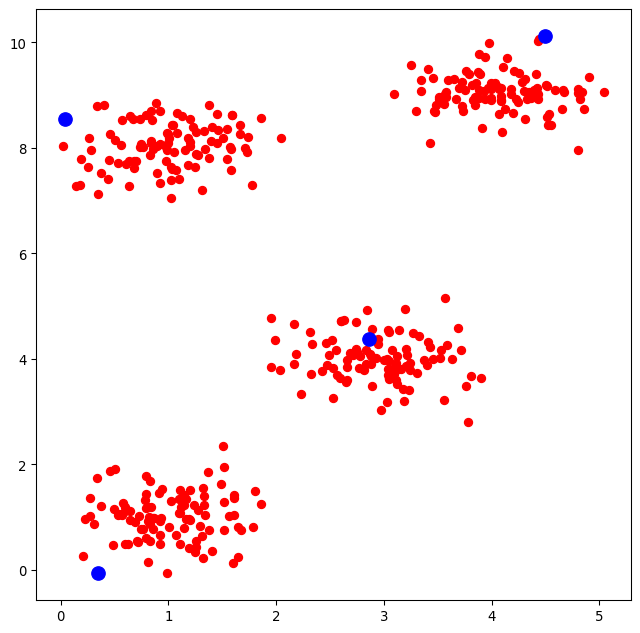

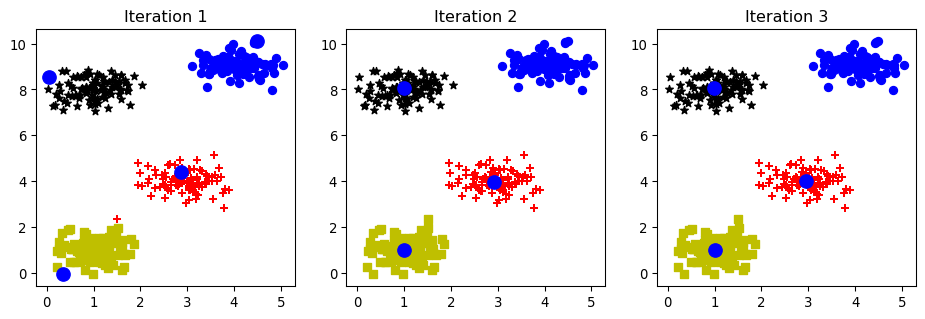

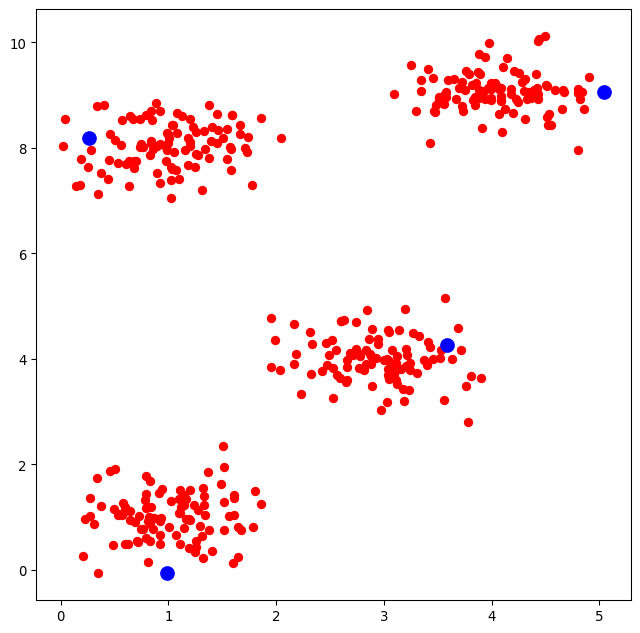

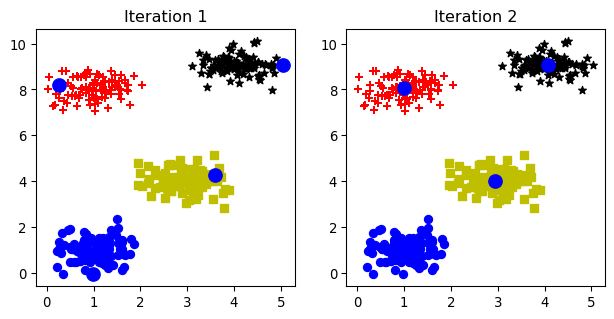

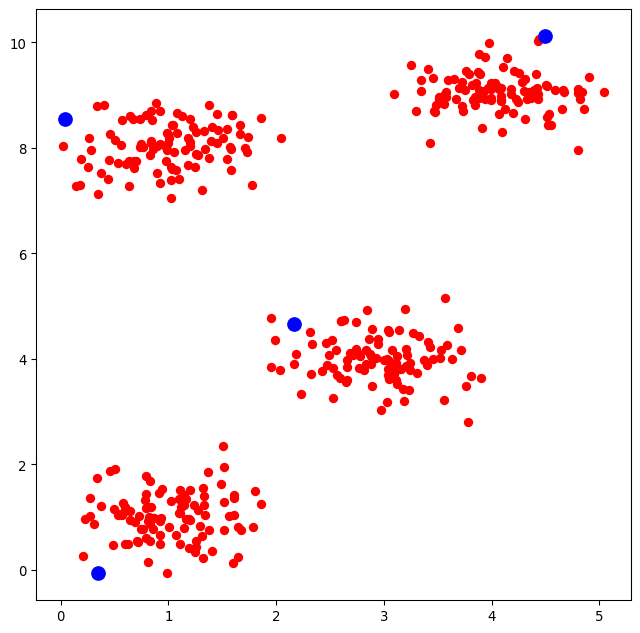

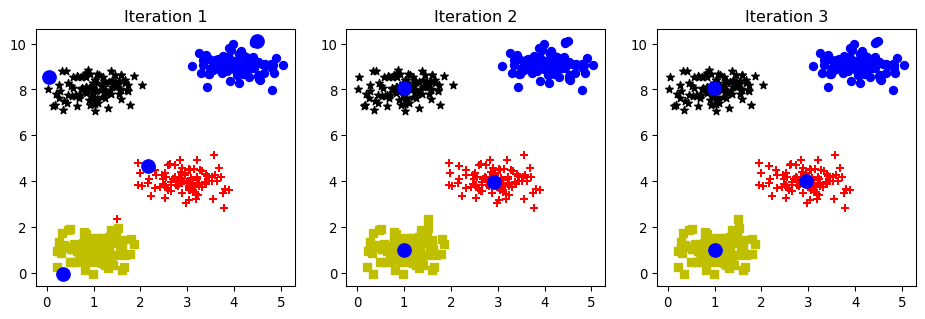

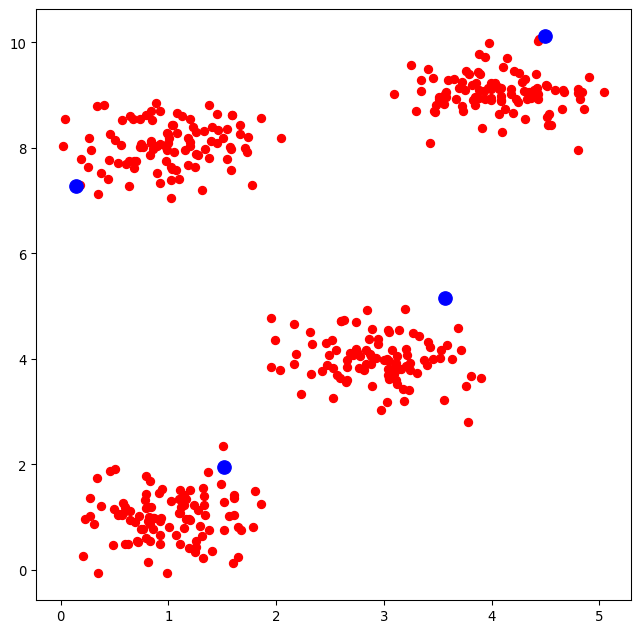

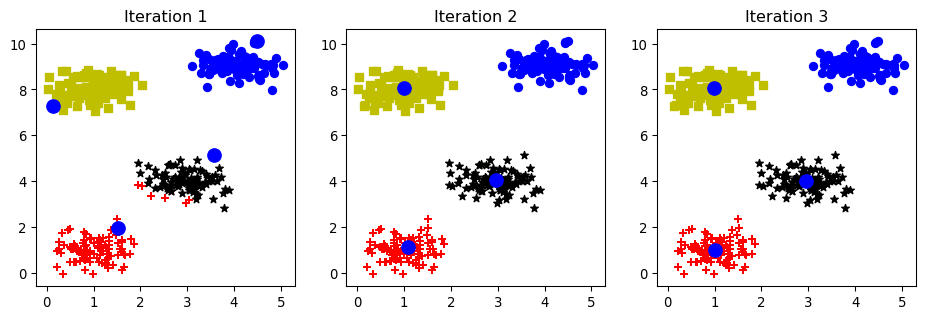

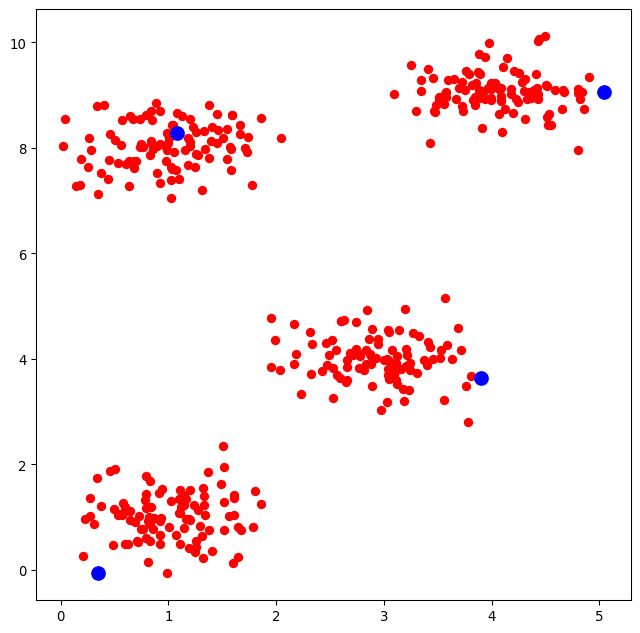

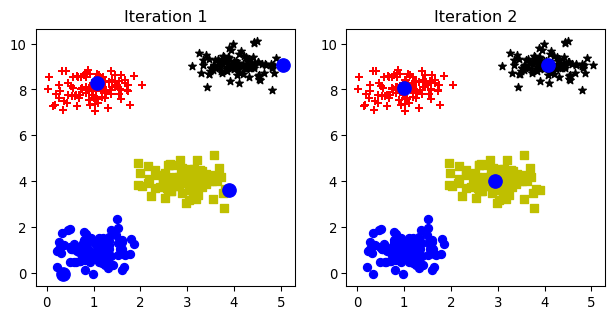

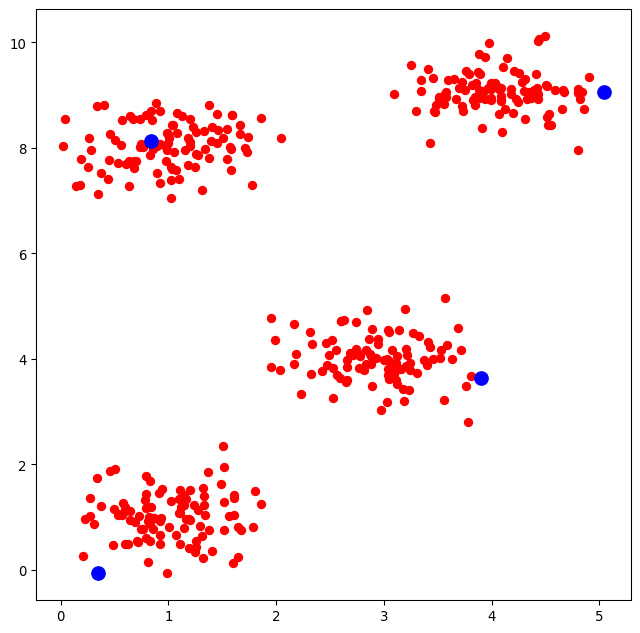

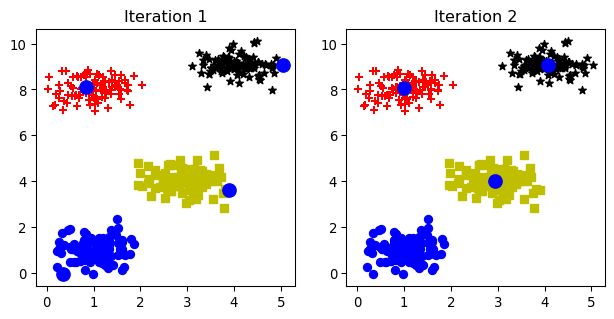

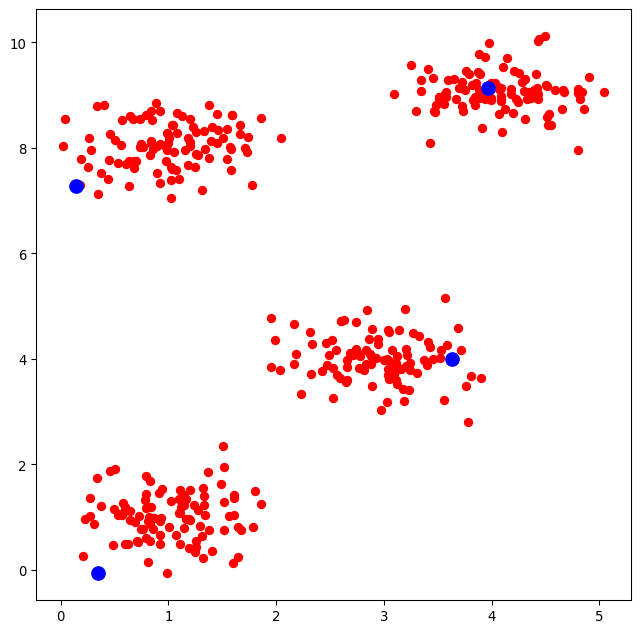

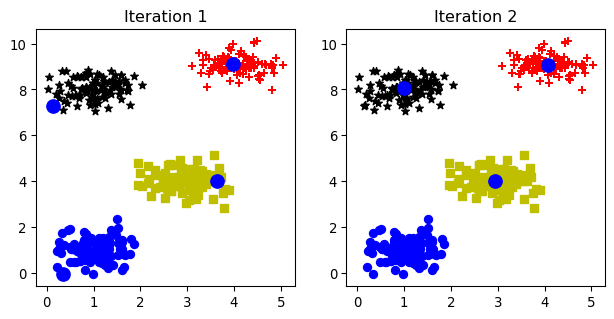

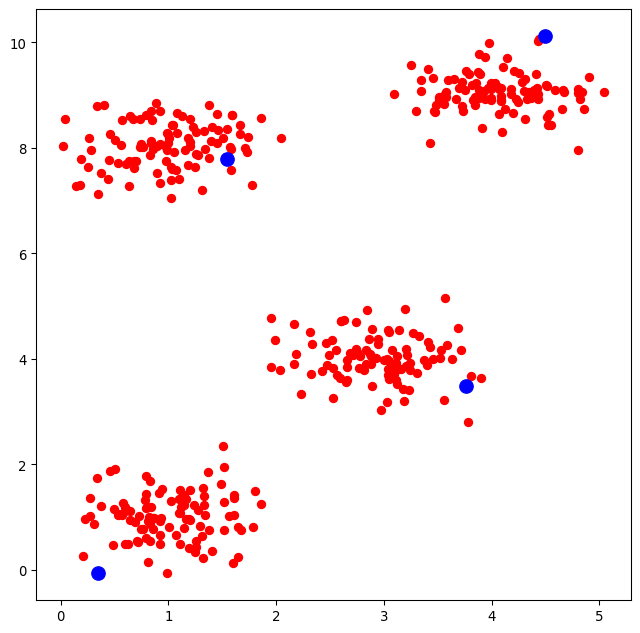

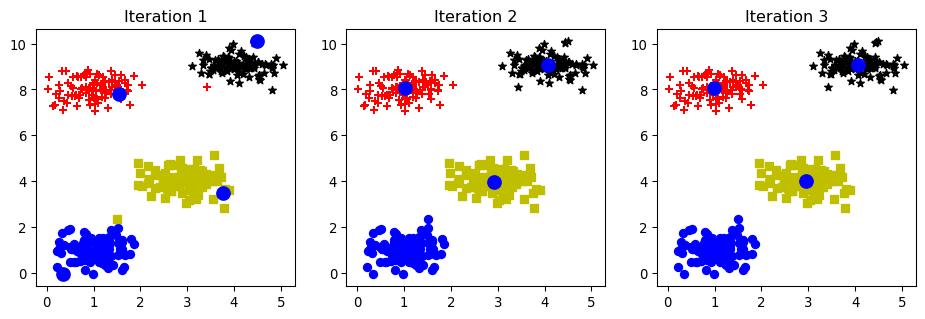

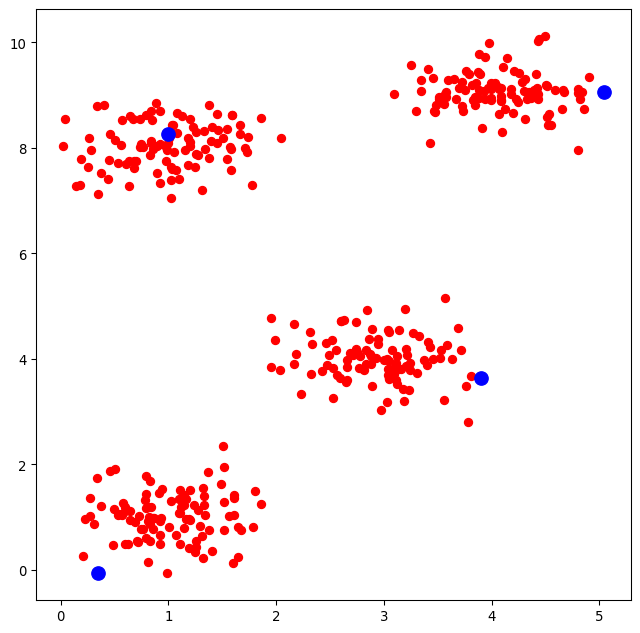

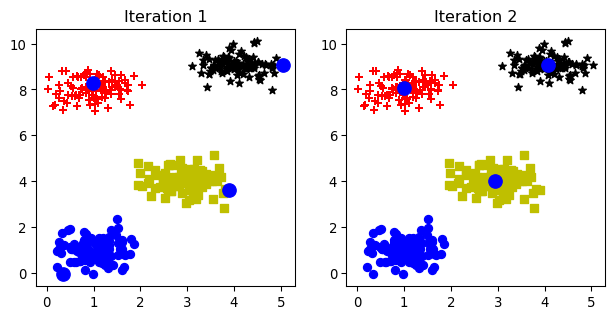

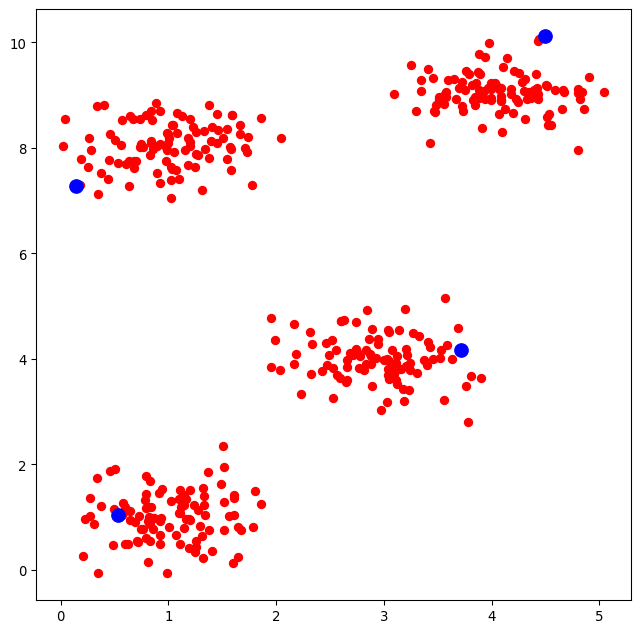

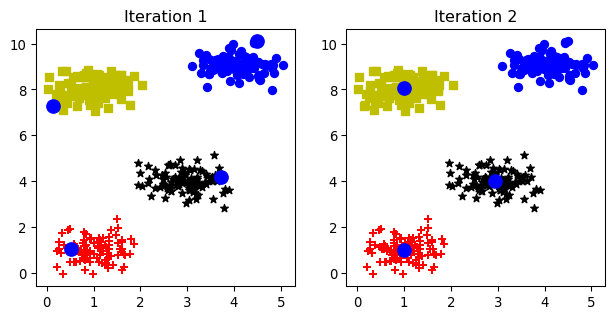

In [14]:
k = 4
# List of 10 seeds for reproducibility
seeds = [42, 123, 256, 789, 101, 999, 57, 301, 567, 893]

for j, seed in enumerate(seeds):
    print(f"Iteration {j+1}")
    init_centroids = strategic_initialization(X, k, seed)
    fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
    plt.scatter(X[:, 0], X[:, 1], c='r')
    plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='b', marker='o', s=100)
    centroids = init_centroids
    fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')

    converged= False
    for iters in range(16):
        distances = np.zeros((X.shape[0], k))
        for i in range(k):
            for j in range(X.shape[0]):
                distances[j, i] = np.sqrt(np.sum((X[j, :] - centroids[i, :])**2))
        assigned_cluster = np.argmin(distances, axis=1)
        ax = fig.add_subplot(4, 4, iters + 1)
        ax.scatter(X[np.where(assigned_cluster == 0)[0],0],X[np.where(assigned_cluster == 0)[0],1],c='r',marker='+')
        ax.scatter(X[np.where(assigned_cluster == 1)[0],0],X[np.where(assigned_cluster == 1)[0],1],c='b',marker='o')
        ax.scatter(X[np.where(assigned_cluster == 2)[0],0],X[np.where(assigned_cluster == 2)[0],1],c='y',marker='s')
        ax.scatter(X[np.where(assigned_cluster == 3)[0],0],X[np.where(assigned_cluster == 3)[0],1],c='k',marker='*')
        ax.scatter(centroids[:, 0], centroids[:, 1], c='b', marker='o', s=100)
        ax.set_title(f'Iteration {iters+1}')

        new_centroids=np.array([X[np.where(assigned_cluster==i)[0]].mean(axis=0) if len(np.where(assigned_cluster == i)[0]) > 0 else centroids[i] for i in range(k)])
        
        # Check for convergence
        if np.allclose(new_centroids,centroids):
            print(f"Converged at iteration {iters+1}")
            converged=True
            break

        centroids=new_centroids

    if not converged:
        print("Reached maximum iterations of 16.")


### k-Means on Handwritten Digit Recognition Data
We can use k-means on the handwritten digits data set

In [16]:
mat = loadmat('mnist_all.mat') 
alltraindata = mat.get('train0')
for i in range(1,10):
    m = mat.get('train'+str(i))
    alltraindata = np.vstack((alltraindata,m))
alltraindata = np.array(alltraindata,dtype=float)
X = scale(alltraindata)

In [17]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
s = np.random.permutation(X.shape[0])
kmeans.fit(X[s[0:10000],:])
#kmeans.fit(X)


KMeans(n_clusters=10, n_init=10)

In [18]:
kmeans.labels_.shape

(10000,)

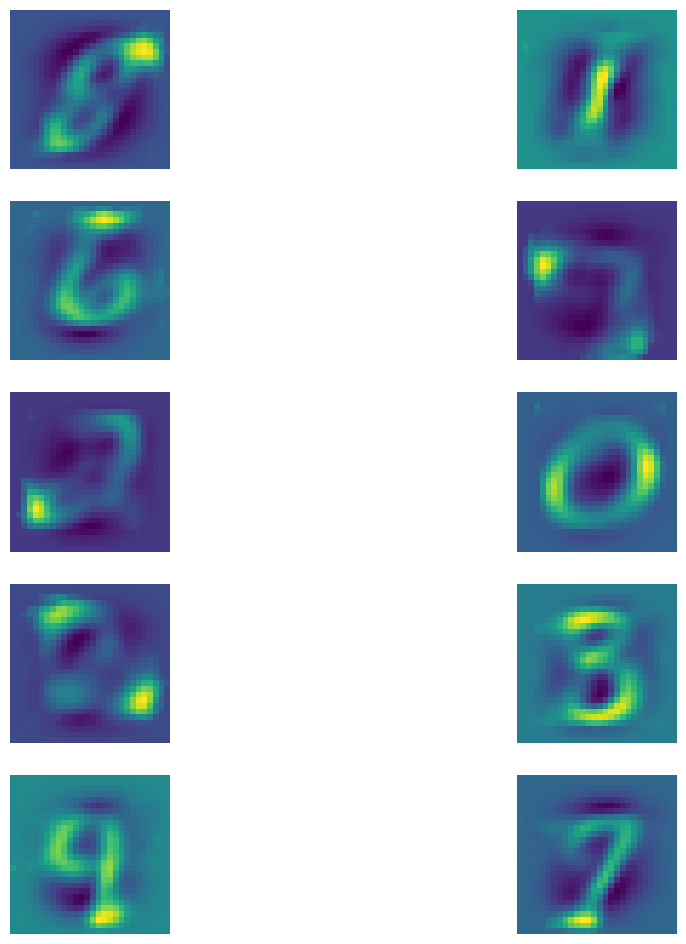

In [19]:
#plot the centroids
fig = plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(5,2,i+1)
    row = kmeans.cluster_centers_[i,:]
    # note that each row is a flattened image
    # we first reshape it to a 28x28 matrix
    plt.imshow(np.reshape(row,((28,28))))
    plt.axis('off')